In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
# We'll set a seed here so our runs are consistent
np.random.seed(10)

# Let's define some 'true' population parameters, we'll pretend we don't know these.
POPULATION_MU = 64
POPULATION_SIGMA = 5

# Generate our sample by drawing from the population distribution
sample_size = 10
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
print(heights)
mean_height  = np.mean(heights)
print(f"sample mean: {mean_height}")


[70.65793252 67.57639487 56.27299854 63.95808075 67.10667987 60.3995722
 65.32755793 64.54274263 64.02145715 63.12699895]
sample mean: 64.29904154070394


In [3]:
print(f"sample standard deviation: {np.std(heights)}")

sample standard deviation: 3.759878018454642


In [4]:
SE = np.std(heights) / np.sqrt(sample_size)
print('standard error: ', SE)

standard error:  1.1889778262717268


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_27168\4041146422.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$')


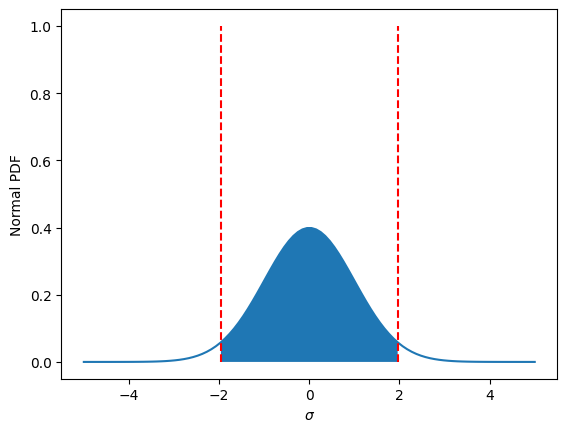

In [5]:
# Set up the x axis
x = np.linspace(-5,5,100)
# Here's the normal distribution
y = stats.norm.pdf(x,0,1)
plt.plot(x,y)

# Plot our bounds
plt.vlines(-1.96, 0, 1, colors='r', linestyles='dashed')
plt.vlines(1.96, 0, 1, colors='r', linestyles='dashed')

# Shade the area
fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y)

plt.xlabel('$\sigma$')
plt.ylabel('Normal PDF');

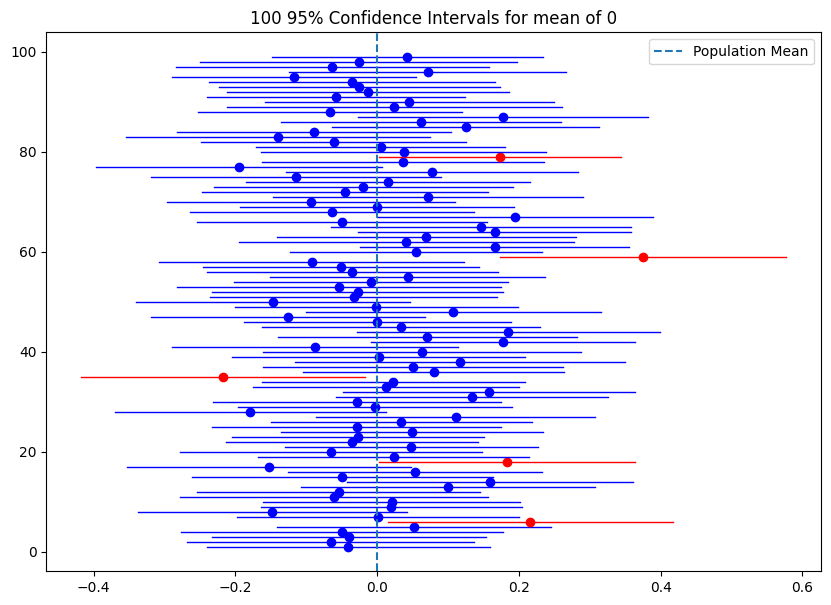

In [6]:
np.random.seed(8309)
n = 100 # number of samples to take
samples = [np.random.normal(loc=0, scale=1, size=100) for _ in range(n)]

fig, ax = plt.subplots(figsize=(10, 7))
for i in np.arange(1, n, 1):
    sample_mean = np.mean(samples[i])  # calculate sample mean
    se = stats.sem(samples[i])  # calculate sample standard error
    h = se*stats.t.ppf((1+0.95)/2, len(samples[i])-1) # calculate t; 2nd param is d.o.f. 
    sample_ci = [sample_mean - h, sample_mean + h]
    if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='blue', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'bo');
    else:
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='red', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'ro');
plt.axvline(x=0, ymin=0, ymax=1, linestyle='--', label = 'Population Mean');
plt.legend(loc='best');
plt.title('100 95% Confidence Intervals for mean of 0');

In [10]:
# standard error SE was already calculated
t_val = stats.t.ppf((1+0.95)/2, 9)  # d.o.f. = 10 - 1
print('sample mean height:', mean_height)
print('t-value:', t_val)
print('standard error:', SE)
print('confidence interval:', (mean_height - t_val * SE, mean_height + t_val * SE))

sample mean height: 64.29904154070394
t-value: 2.2621571628540993
standard error: 1.1889778262717268
confidence interval: (np.float64(61.60938683452866), np.float64(66.98869624687923))


In [12]:
print('99% confidence interval:', stats.t.interval(0.99, df=9,loc=mean_height, scale=SE))
print('95% confidence interval:', stats.t.interval(0.95, df=9,loc=mean_height, scale=SE))
print('80% confidence interval:', stats.t.interval(0.8, df=9,loc=mean_height, scale=SE))


99% confidence interval: (np.float64(60.43505914272114), np.float64(68.16302393868675))
95% confidence interval: (np.float64(61.60938683452866), np.float64(66.98869624687923))
80% confidence interval: (np.float64(62.65465103765395), np.float64(65.94343204375393))


In [13]:
print(stats.norm.interval(0.99, loc=mean_height, scale=SE))
print(stats.norm.interval(0.95, loc=mean_height, scale=SE))
print(stats.norm.interval(0.80, loc=mean_height, scale=SE))

(np.float64(61.23643761452335), np.float64(67.36164546688453))
(np.float64(61.968687822794635), np.float64(66.62939525861324))
(np.float64(62.77530514604759), np.float64(65.82277793536029))


In [14]:
np.random.seed(10)

sample_sizes = [10, 100, 1000]
for s in sample_sizes:
    heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, s)
    SE = np.std(heights) / np.sqrt(s)
    print(stats.norm.interval(0.95, loc=mean_height, scale=SE))

(np.float64(61.968687822794635), np.float64(66.62939525861324))
(np.float64(63.343692029946574), np.float64(65.2543910514613))
(np.float64(64.00593339807287), np.float64(64.59214968333501))


# Visualizing Confidence Intervals


63.588854219913536 65.57346359543473


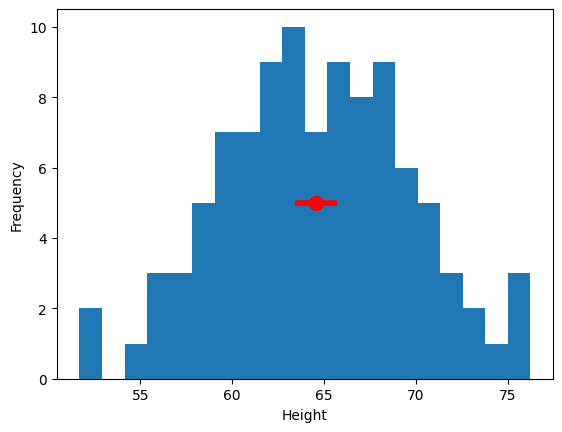

In [16]:
sample_size = 100
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
SE = np.std(heights) / np.sqrt(sample_size)
(l, u) = stats.norm.interval(0.95, loc=np.mean(heights), scale=SE)

print (l, u)

plt.hist(heights, bins=20)
plt.xlabel('Height')
plt.ylabel('Frequency')

# Just for plotting
y_height = 5
plt.plot([l, u], [y_height, y_height], '-', color='r', linewidth=4, label='Confidence Interval')
plt.plot(np.mean(heights), y_height, 'o', color='r', markersize=10);

# Miscalibration and Violation of Assumptions


# Example: Autocorrelated Data


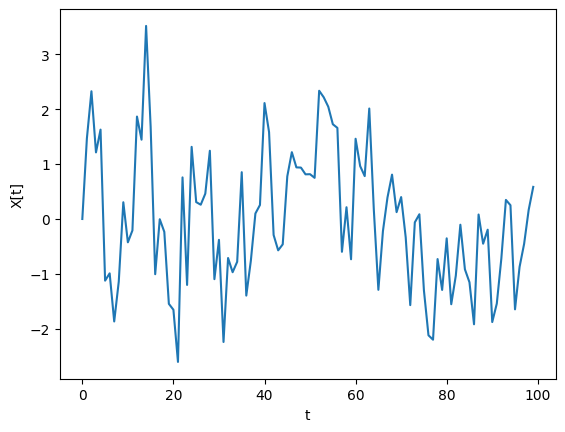

In [17]:
def generate_autocorrelated_data(theta, mu, sigma, N):
    # Initialize the array
    X = np.zeros((N, 1))
    
    for t in range(1, N):
        # X_t = theta * X_{t-1} + epsilon
        X[t] = theta * X[t-1] + np.random.normal(mu, sigma)
    return X

X = generate_autocorrelated_data(0.5, 0, 1, 100)

plt.plot(X);
plt.xlabel('t');
plt.ylabel('X[t]');

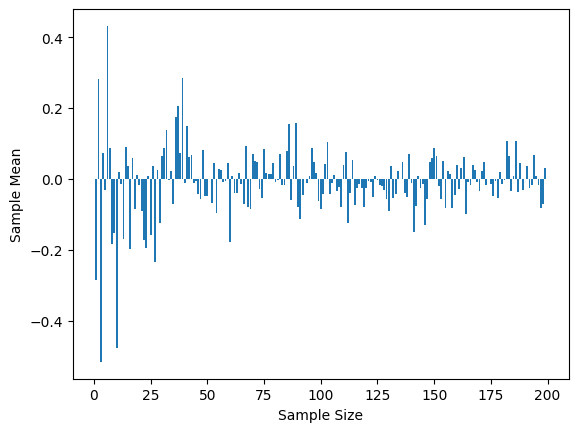

In [18]:
sample_means = np.zeros(200-1)
for i in range(1, 200):
    X = generate_autocorrelated_data(0.5, 0, 1, i * 10)
    sample_means[i-1] = np.mean(X)
    
plt.bar(range(1, 200), sample_means);
plt.xlabel('Sample Size');
plt.ylabel('Sample Mean');

In [ ]:
np.mean(sample_means)

np.float64(-0.008571996202976648)

In [20]:
def compute_unadjusted_interval(X):
    T = len(X)
    # Compute mu and sigma MLE
    mu = np.mean(X)
    sigma = np.std(X)
    SE = sigma / np.sqrt(T)
    # Compute the bounds
    return stats.norm.interval(0.95, loc=mu, scale=SE)

# We'll make a function that returns true when the computed bounds contain 0
def check_unadjusted_coverage(X):
    l, u = compute_unadjusted_interval(X)
    # Check to make sure l <= 0 <= u
    if l <= 0 and u >= 0:
        return True
    else:
        return False

In [22]:
T = 100
trials = 500
times_correct = 0
for i in range(trials):
    X = generate_autocorrelated_data(0.5, 0, 1, T)
    if check_unadjusted_coverage(X):
        times_correct += 1

print(f'Empirical Coverage:{times_correct/float(trials)}')
print(f'Expected Coverage: {0.95}')

Empirical Coverage:0.69
Expected Coverage: 0.95
